### Kaggle competetion: Rice type classification
- Original dataset: https://www.kaggle.com/datasets/mssmartypants/rice-type-classification

The tasks are to:
- Explore the rice detail characteristics to build a ML binary classifer for rice types
- Distinguish between Jasmine - 1, Gonen - 0 Rice using different models

Potential ML Models:
- Decision Trees, Random Forest, KNN Classifier


### Imports

In [266]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

import graphviz 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

# import warnings
# warnings.filterwarnings('ignore')

### Load and explore the data

In [343]:
# get rice csv files as a pandas DataFrame
rice_data_df = pd.read_csv("riceClassification.csv")
# preview the top-5 rows of the data
rice_data_df.head(5)

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [344]:
rice_data_df.shape

(18185, 12)

In [345]:
# attributes for each data sample
rice_data_df.columns

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [346]:
# Generate descriptive statistics of each numerical feature
rice_data_df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


In [347]:
# Analyze the columns to see the data types.(All numerical, no categorical)
rice_data_df.dtypes

id                   int64
Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Perimeter          float64
Roundness          float64
AspectRation       float64
Class                int64
dtype: object

In [348]:
# Check if the Class type(rice types) are balanced
rice_data_df.Class.value_counts()

1    9985
0    8200
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

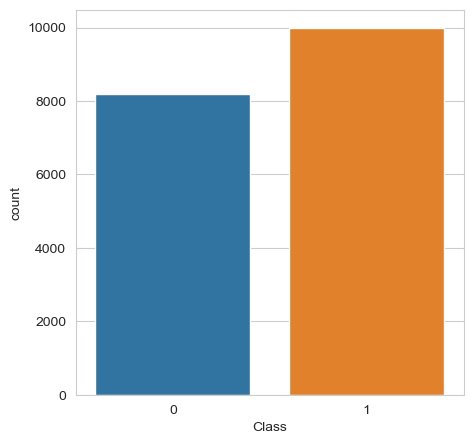

In [349]:
plt.figure(figsize=(5,5))
sns.countplot(x='Class',data=rice_data_df)

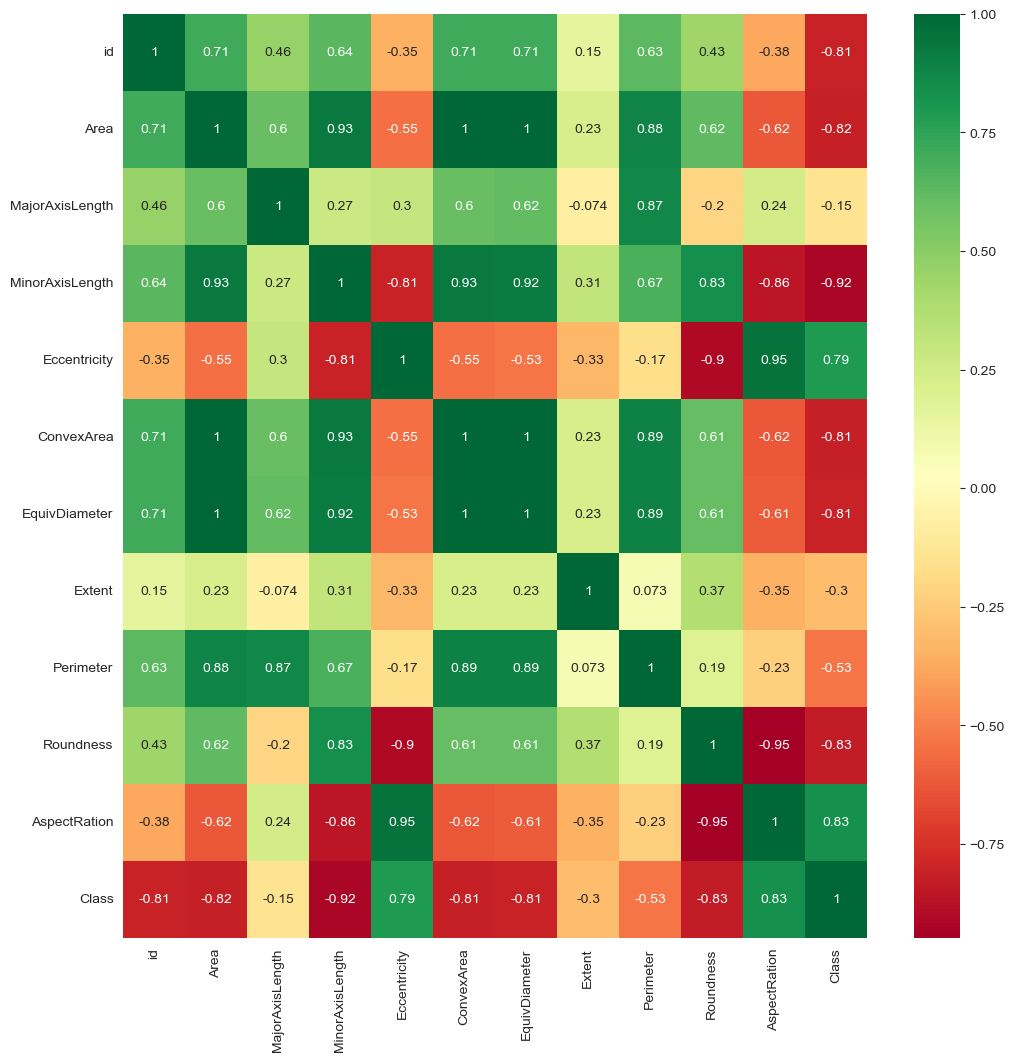

In [350]:
# Visualize the correlation matrix as a heatmap

_, ax = plt.subplots(figsize=(12,12))
columns = ['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'EquivDiameter', 'Extent','Perimeter','Roundness','AspectRation','Class']
sns.heatmap(rice_data_df[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

### Data Preprocessing

In this section, we focus on making the data ready to use for ML models. It includes:

- dropping unnecessary fields
- filling in missing values
- rearranging data

In [351]:
# We drop the 'id' column because it isn't useful in the analysis or prediction. We also drop one of ConvexArea, Area 
#or EquivDiameter because it has the almost the same correlation values across all predictors and target variables.
rice_data_df = rice_data_df.drop(['id', 'ConvexArea', 'Area'], axis=1)

In [352]:
# We can see there are no missing elements in the data dataframe. The data is clean and doesn't need to replace 
# the missing values. 

rice_data_df.isnull().sum()

MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

### Model training and evaluation

#### DT classifier

In [353]:
feature_cols = ["MajorAxisLength", "MinorAxisLength", "Eccentricity",'EquivDiameter', "Extent", "Perimeter", "Roundness", "AspectRation"]
X = rice_data_df[feature_cols]
y = rice_data_df.Class


In [354]:
X.columns, y

(Index(['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'EquivDiameter',
        'Extent', 'Perimeter', 'Roundness', 'AspectRation'],
       dtype='object'),
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 18180    0
 18181    0
 18182    0
 18183    0
 18184    0
 Name: Class, Length: 18185, dtype: int64)

In [355]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 75% training and 25% test -> default

In [356]:
# Create Decision Tree classifer object
dt = DecisionTreeClassifier(random_state = 0, max_depth=3, min_samples_split=10, min_samples_leaf=3)
# We use max_depth = 3, min_samples_split = 10 and min_samples_leaf = 3 in order to make the visualization easier 
# to read and to limit pre/post - pruning

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [357]:
#Score of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.987024411700022


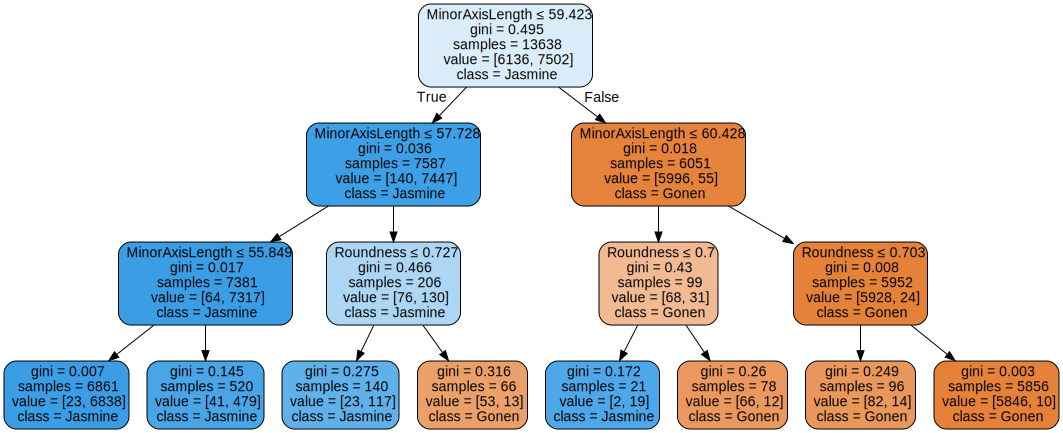

In [358]:
#Visualization
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=X.columns,  
                                 class_names=["Gonen", "Jasmine"],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### KNN Classifier(K Nearest Neighbors Classifier)

In [397]:
feature_cols = ["MajorAxisLength", "MinorAxisLength", "Eccentricity","EquivDiameter", "Extent", "Perimeter", "Roundness", "AspectRation"]
X = rice_data_df[feature_cols]
y = rice_data_df.Class

In [361]:
Gonen = rice_data_df[rice_data_df.Class == 0]
Gonen

,MajorAxisLength,MinorAxisLength,Eccentricity,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
2490,105.285823,77.522743,0.676647,89.227613,0.601945,298.014,0.884759,1.358128,0
2502,101.779216,74.905502,0.677024,86.267521,0.687647,285.024,0.904131,1.358768,0
2599,99.521156,72.983212,0.679858,84.062355,0.623596,278.677,0.898050,1.363617,0
2600,104.441574,75.396796,0.691993,87.243487,0.677778,298.835,0.841207,1.385226,0
2701,102.530729,73.767040,0.694531,84.462780,0.628844,291.651,0.827758,1.389926,0
...,...,...,...,...,...,...,...,...,...
18180,148.624571,51.029281,0.939210,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,169.593996,58.141659,0.939398,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,154.777085,52.908085,0.939760,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,151.397924,51.474600,0.940427,87.112041,0.492399,343.371,0.635227,2.941216,0


In [362]:
Jasmine = rice_data_df[rice_data_df.Class ==1]

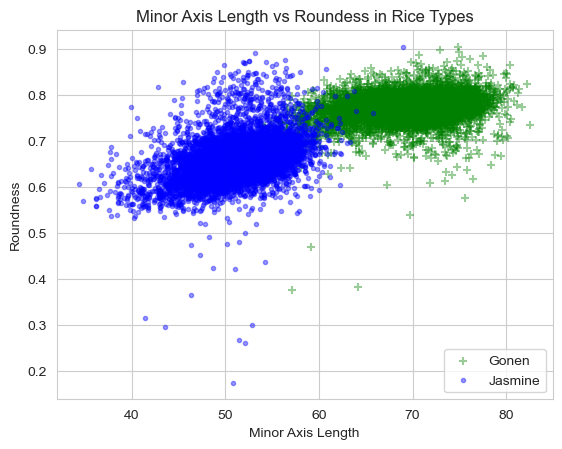

In [363]:
#Visualization:

#We graph the features MinorAxisLength vs Roundness to see the clusters of rice types. We use these two features 
#because they have the highest correlation with the the target Class variable. 

plt.xlabel("Minor Axis Length")
plt.ylabel("Roundness")
plt.title("Minor Axis Length vs Roundess in Rice Types")

plt.scatter(Gonen["MinorAxisLength"], Gonen["Roundness"], color = "green",alpha = 0.4, marker="+")
plt.scatter(Jasmine["MinorAxisLength"], Jasmine["Roundness"], color = "blue",alpha = 0.4, marker=".")
plt.legend(['Gonen', 'Jasmine'], loc ="lower right")

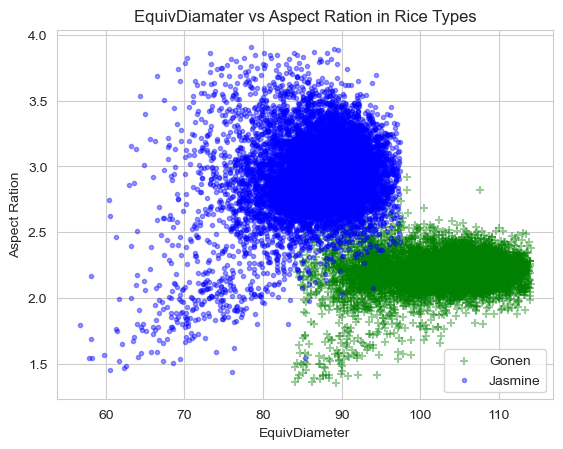

In [364]:
#Visualization:

#We graph the features EquivDiameter vs AspectRation to further see differentiation in the clusters of rice types. We use 
#these two features because they have also have a high correlation with the the target Class variable. 

plt.xlabel("EquivDiameter")
plt.ylabel("Aspect Ration")
plt.title("EquivDiamater vs Aspect Ration in Rice Types")

plt.scatter(Gonen["EquivDiameter"], Gonen["AspectRation"], color = "green",alpha = 0.4, marker="+")
plt.scatter(Jasmine["EquivDiameter"], Jasmine["AspectRation"], color = "blue",alpha = 0.4, marker=".")
plt.legend(['Gonen', 'Jasmine'], loc ="lower right")

In [398]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [387]:
len(X_train), len(X_test)

(13638, 4547)

In [388]:
#Create KNN classifier 
knn = KNeighborsClassifier() #We will try different K-values, but for now we will use the default of k = 5

In [389]:
#Train KNN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [390]:
##Score of the model
knn.score(X_test, y_test)

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9859247855729052

In [393]:
#For K = 3
#Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)

In [394]:
#Train KNN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [395]:
#Score of the model
knn.score(X_test, y_test)

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9852650098966351

In [399]:
#For K = 10:
#Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

In [400]:
#Train KNN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [401]:
#Score of the model
knn.score(X_test, y_test)

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9879041126017154

### Model Explaination and Evaluation 

- For both the decision tree and KNN classifier we use the default 75% training and 25% test. We trained both models with all the feature variables minus 'id' and 'EquivDiameter' and the target 'Class' variable.

- Using the score function, we can check the accuracy of each model. 
- For the decision tree, it scored 0.987024411700022
- For the knn classifer at K = 3, 5, 10 the corresponding accuracy scores are: 0.9852650098966351, 0.9859247855729052, and 0.9879041126017154. 
- For K values of 3 and 5, the Decision Tree performs better, at K = 10, the Knn classifier performs better.(Could be due to chance however)

- In conclusion, the decision tree is more accurate than the knn classifier model for the binary classification of the rice data types at lower levels of K. (Although the decison tree is faster because knn classifer has to scan the whole dataset to make predictions, while decision trees do not.)


### Error Analysis

Text(60.222222222222214, 0.5, 'Truth')

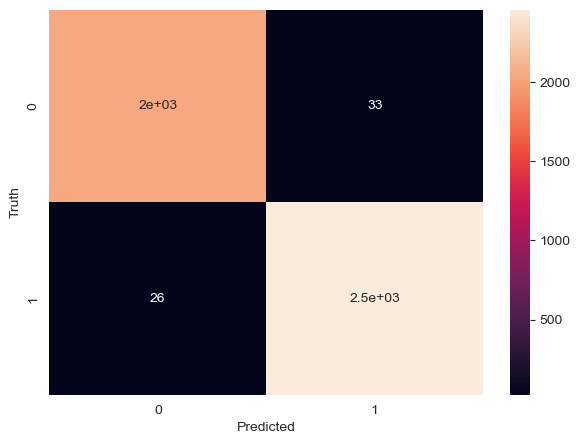

In [359]:
# Confusion Matrix of Decision Trees

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

From the confusion matrix above, the decision tree predicts Gonen 26 times when it actually is Jasmine and Jasmine 33 times when it really is Gonen. These errors are possible due to the when Jasmine and Gonen rice types have many similar intersecting feature variables(Shown in the MinorAxisLength vs Roundness and ConvexArea vs AspectRation) and it is hard to create pure nodes that entirely seperate the two rice types.(Generates close to pure but still inperfect nodes)

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(60.222222222222214, 0.5, 'Truth')

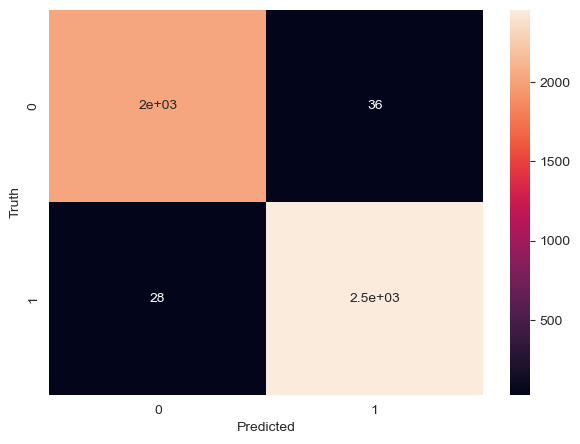

In [391]:
# Confusion Matrix of Knn Classifier(default)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(60.222222222222214, 0.5, 'Truth')

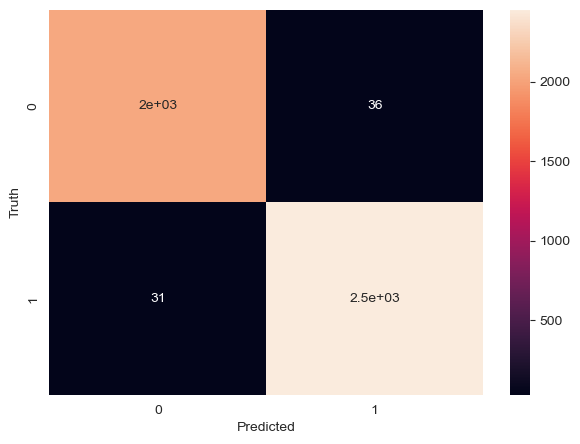

In [396]:
# Confusion Matrix of Knn Classifier(K = 3)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

/Users/leontan/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(60.222222222222214, 0.5, 'Truth')

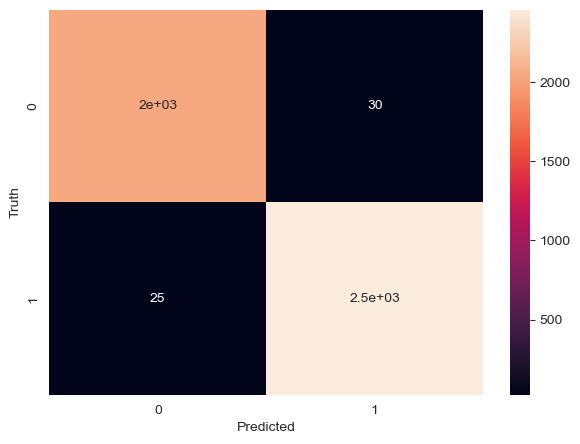

In [402]:
# Confusion Matrix of Knn Classifier(K = 10)

y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

It is very difficult to set a suitable K for a given training dataset. The errors of the Knn classifer are largely due to the fact that it considers the entire set of n points for every execution, as a result at certain K levels, errors can be made because of some points outside its known cluster/outliers which lead to faulty predictions. 

From the confusion matrixes above, the Knn classifiers in total makes similar amounts errors than the decison tree at lower levels of K. The Knn classifer models make 67, 64 and 55 errors for K values of 3, 5 and 10 respectively. The decision tree made 57 errors in comparison.

### Conclusion

We can use both the Decision Tree and Knn Classifer models to build a binary classifer for rice types. Both models are at least 97% accurate in predicting the correct rice class. Decison Trees is the better model for the classifer regardless of the K-value of the Knn Classifer.(A small value of k could lead to overfitting as well as a big value of k can lead to underfitting, but it doesn't matter in this case in comparison to the Decision Tree.)(Plus, Knn is a lazy alogrithm while, Decision Trees are eager learners)